In [91]:
#泰坦尼克号练习
import torch
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
#加载数据
file_path='Titanic_dataset/train.csv'

# 使用 pandas 读取数据
df = pd.read_csv(file_path)
X_selected_columns=df[['Pclass','Age', 'SibSp', 'Parch','Fare']].to_numpy()
Y_selected_columns=df[['Survived']].to_numpy()
x_data = torch.tensor(X_selected_columns, dtype=torch.float32)
y_data=torch.tensor(Y_selected_columns, dtype=torch.float32)

# 检查并去除包含 NaN 或 Inf 值的行
valid_mask = ~torch.isnan(x_data).any(dim=1) & ~torch.isinf(x_data).any(dim=1)

#使用布尔掩码选取或弃用数据并对其行
x_data = x_data[valid_mask]
y_data = y_data[valid_mask]


print(x_data)
print(y_data)



tensor([[ 3.0000, 22.0000,  1.0000,  0.0000,  7.2500],
        [ 1.0000, 38.0000,  1.0000,  0.0000, 71.2833],
        [ 3.0000, 26.0000,  0.0000,  0.0000,  7.9250],
        ...,
        [ 1.0000, 19.0000,  0.0000,  0.0000, 30.0000],
        [ 1.0000, 26.0000,  0.0000,  0.0000, 30.0000],
        [ 3.0000, 32.0000,  0.0000,  0.0000,  7.7500]])
tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.]

In [93]:
class tita_train(torch.nn.Module):
    def __init__(self):
        super(tita_train,self).__init__()
        self.linear1=torch.nn.Linear(5,8)
        self.linear2=torch.nn.Linear(8,6)
        self.linear3=torch.nn.Linear(6,3)
        self.linear4=torch.nn.Linear(3,1)
        self.sigmoid1=torch.nn.ReLU()
        self.sigmoid2=torch.nn.Sigmoid()

    def forward(self,x):
        x=self.sigmoid1(self.linear1(x))
        x=self.sigmoid1(self.linear2(x))
        x=self.sigmoid1(self.linear3(x))
        x=self.sigmoid2(self.linear4(x))
        return x

#实例化    
module=tita_train()

#损失与优化器
criterion=torch.nn.BCELoss(reduction='mean')
optimizer=torch.optim.SGD(module.parameters(),lr=0.01)

In [94]:
#训练模型
epo=[]
los=[]

for epoch in range(1000):
    y_pred=module(x_data)
    #print(y_pred)
    loss=criterion(y_pred,y_data)
    #数据收集
    epo.append(epoch)
    los.append(loss.item())
    
    if epoch%10==9:
        print(f"epoch:{epoch},loss:{loss.item():.4f}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch:9,loss:0.6568
epoch:19,loss:0.6491
epoch:29,loss:0.6448
epoch:39,loss:0.6422
epoch:49,loss:0.6406
epoch:59,loss:0.6393
epoch:69,loss:0.6381
epoch:79,loss:0.6371
epoch:89,loss:0.6360
epoch:99,loss:0.6351
epoch:109,loss:0.6343
epoch:119,loss:0.6335
epoch:129,loss:0.6327
epoch:139,loss:0.6320
epoch:149,loss:0.6313
epoch:159,loss:0.6307
epoch:169,loss:0.6301
epoch:179,loss:0.6295
epoch:189,loss:0.6290
epoch:199,loss:0.6285
epoch:209,loss:0.6281
epoch:219,loss:0.6276
epoch:229,loss:0.6272
epoch:239,loss:0.6268
epoch:249,loss:0.6264
epoch:259,loss:0.6260
epoch:269,loss:0.6256
epoch:279,loss:0.6253
epoch:289,loss:0.6249
epoch:299,loss:0.6246
epoch:309,loss:0.6243
epoch:319,loss:0.6240
epoch:329,loss:0.6237
epoch:339,loss:0.6234
epoch:349,loss:0.6231
epoch:359,loss:0.6228
epoch:369,loss:0.6226
epoch:379,loss:0.6223
epoch:389,loss:0.6221
epoch:399,loss:0.6218
epoch:409,loss:0.6216
epoch:419,loss:0.6213
epoch:429,loss:0.6211
epoch:439,loss:0.6209
epoch:449,loss:0.6207
epoch:459,loss:0.6205

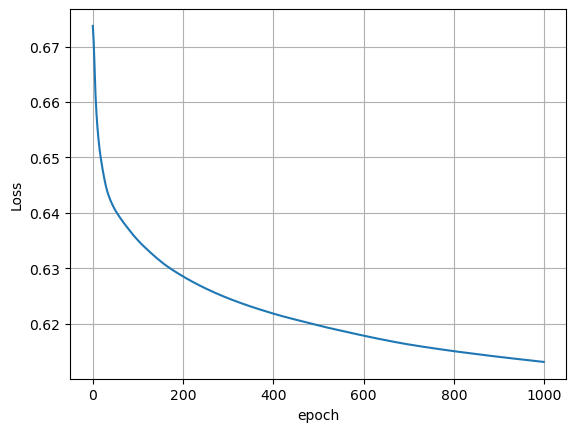

In [95]:
#数据可视化
plt.plot(epo,los)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid(True)#显示网格
plt.show()

In [96]:
#测试模型
#加载测试数据
file_t_path='Titanic_dataset/test.csv'

# 使用 pandas 读取数据
df_t = pd.read_csv(file_t_path)
X_test_set=df_t[['Pclass','Age', 'SibSp', 'Parch','Fare']].to_numpy()
x_tdata = torch.tensor(X_test_set, dtype=torch.float32)

# 检查并去除包含 NaN 或 Inf 值的行
valid_tmask = ~torch.isnan(x_tdata).any(dim=1) & ~torch.isinf(x_tdata).any(dim=1)

#使用布尔掩码选取或弃用数据并对其行
x_tdata = x_tdata[valid_tmask]

print(x_tdata)

tensor([[  3.0000,  34.5000,   0.0000,   0.0000,   7.8292],
        [  3.0000,  47.0000,   1.0000,   0.0000,   7.0000],
        [  2.0000,  62.0000,   0.0000,   0.0000,   9.6875],
        ...,
        [  3.0000,  28.0000,   0.0000,   0.0000,   7.7750],
        [  1.0000,  39.0000,   0.0000,   0.0000, 108.9000],
        [  3.0000,  38.5000,   0.0000,   0.0000,   7.2500]])


In [97]:
#预测值
y_test=module(x_tdata)
#设置阀值
y_tprd=(y_test>=0.5).int()
print(y_tprd)

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],